In [1]:
import pandas as pd 

# Cargar el archivo JSON en un DataFrame
df = pd.read_json(r'C:\Users\Luis\Documents\GitHub\TFM_KSCHOOL\Luis\PreModelado_TFM_Palas\Noviembre\PreModelado_Palas\archivos_accesorios\dataframe_final_palas.json', lines=True)

In [2]:
# import pandas as pd
# 
# # Ruta al archivo CSV
# ruta_csv = r'C:\Users\Luis\Documents\GitHub\TFM_KSCHOOL\DataSets\PNpalas_DF_2.csv'
# 
# # Paso 1: Cargar el archivo CSV
# df = pd.read_csv(ruta_csv)
# 
# # Paso 2: Verificar las primeras filas del DataFrame cargado para asegurarse de que todo está bien
# print(df.head())
# 
# # Si necesitas realizar alguna transformación adicional (como cambiar nombres de columnas, limpieza de datos, etc.)
# # Aquí puedes agregar las transformaciones que necesites. Ejemplo de renombrar columnas:
# # df.rename(columns={'old_column_name': 'new_column_name'}, inplace=True)
# 
# # Paso 3: Guardar el DataFrame en un nuevo archivo CSV (si deseas guardar el archivo procesado)
# df.to_csv(r'C:\Users\Luis\Documents\GitHub\TFM_KSCHOOL\DataSets\PNpalas_DF_2_procesado.csv', index=False)
# 
# # Ver las primeras filas del DataFrame final para confirmar que todo está correcto
# print(df.head())


In [3]:
import pandas as pd


# Lista de columnas a eliminar (según lo que marcaste)
columnas_a_eliminar = [
    "producto.caracteristicas",
    "caracteristicas",
    "formato",
    "colección jugadores",
    "producto oficial",
    "nivel_de_juego_original",
    "nivel_de_juego_transformado",
    "nivel_de_juego_numeric"
]

# Eliminar las columnas especificadas
df = df.drop(columns=columnas_a_eliminar)

# Diccionario para renombrar las columnas restantes
nuevos_nombres = {
    "producto.nombre": "Palas",
    "producto.precio": "Precio",
    "producto.url": "URL",
    "marca": "Marca",
    "color 2": "Color",
    "producto": "Producto",
    "balance": "Balance",
    "núcleo": "Nucleo",
    "cara": "Cara",
    "dureza": "Dureza",
    "nivel de juego": "Nivel de Juego",
    "acabado": "Acabado",
    "forma": "Forma",
    "superfície": "Superficie",
    "tipo de juego": "Tipo de Juego",
    "jugador": "Jugador"
}

# Renombrar las columnas
df = df.rename(columns=nuevos_nombres)

# Ver el resultado
print(df.columns)


Index(['Palas', 'Precio', 'URL', 'Marca', 'Color', 'Producto', 'Balance',
       'Nucleo', 'Cara', 'Dureza', 'Nivel de Juego', 'Acabado', 'Forma',
       'Superficie', 'Tipo de Juego', 'Jugador'],
      dtype='object')


In [4]:
df.dtypes

Palas              object
Precio            float64
URL                object
Marca              object
Color              object
Producto           object
Balance            object
Nucleo             object
Cara               object
Dureza             object
Nivel de Juego     object
Acabado            object
Forma              object
Superficie         object
Tipo de Juego      object
Jugador            object
dtype: object

In [5]:
df = df.drop(['Producto', 'Acabado'], axis=1)


In [6]:

#df['Precio'] = df['Precio'].apply(lambda x: float(x.replace('€', '').replace(',', '.').strip()))


In [7]:
df.dtypes

Palas              object
Precio            float64
URL                object
Marca              object
Color              object
Balance            object
Nucleo             object
Cara               object
Dureza             object
Nivel de Juego     object
Forma              object
Superficie         object
Tipo de Juego      object
Jugador            object
dtype: object

In [8]:
df['Tipo de Juego'].unique()

array(['potencia', 'polivalente', 'control', None, 'control, potencia'],
      dtype=object)

In [9]:
filas_con_none = df.isnull().any(axis=1).sum()

print(f'Número de filas con al menos un None o NaN: {filas_con_none}')
import pandas as pd

# Asumimos que ya tienes un DataFrame llamado 'df'

# Reemplazar None o NaN por 'No data' en todo el DataFrame
df.fillna('No data', inplace=True)

# Verificar el cambio
print(df.head())


Número de filas con al menos un None o NaN: 673
                                         Palas  Precio  \
0  NOX AT GENIUS ATTACK 18K AGUSTÍN TAPIA 2024  149.95   
1                          KOMBAT MM3 PRO 2024  125.00   
2                        SIUX ASTRA 3.0 HYBRID   59.95   
3       NOX AT10 GENIUS 12K AGUSTIN TAPIA 2024  161.95   
4                        PALA SIUX FENIX II 3K   89.95   

                                                 URL   Marca  \
0  https://www.padelnuestro.com/nox-at-genius-att...     nox   
1  https://www.padelnuestro.com/kombat-mm3-pro-20...  kombat   
2  https://www.padelnuestro.com/siux-astra-3-0-hy...    siux   
3  https://www.padelnuestro.com/nox-at10-genius-1...     nox   
4  https://www.padelnuestro.com/pala-siux-fenix-i...    siux   

                    Color Balance     Nucleo                Cara   Dureza  \
0                   negro    alto  black eva  aluminio + carbono     dura   
1                  blanco   medio  black eva         carbono 12k

In [10]:
df['Forma'] = df['Forma'].apply(lambda x: str(x.replace('híbrida', 'lágrima').replace(',', '.').strip()))


In [11]:
df['Superficie'] = df['Superficie'].apply(lambda x: x if x in ['rugosa', 'lisa', 'No data'] else 'rugosa')

                            

In [12]:
# Ver los valores únicos en la columna 'Balance'
df['Balance'].unique()

import pandas as pd

# Suponiendo que ya tienes el DataFrame df
# Ejemplo de cómo sería la columna Balance
'''df['Balance'] = pd.DataFrame({
    'Balance': ['alto, medio', 'bajo', 'medio', 'alto', 'medio, bajo', 
                'principiante / intermedio', 'No data', 'avanzado / competición, principiante / intermedio']
})'''

# Aplicamos la función lambda para transformar los valores
df['Balance'] = df['Balance'].apply(lambda x: 
     x if x == 'medio' or x == 'alto' or x == 'bajo'                               
    else 'medio' if 'principiante' in x or 'intermedio' in x 
    else 'alto' if 'avanzado' in x or 'competición' in x 
    else 'No data')

# Ver el resultado
print(df[['Balance']])




     Balance
0       alto
1      medio
2      medio
3      medio
4      medio
..       ...
958     bajo
959  No data
960    medio
961     alto
962     alto

[963 rows x 1 columns]


In [13]:
'''df['Nucleo'] = pd.DataFrame({
    'Nucleo': ['soft eva', 'eva', 'ultrasoft eva', 'hard eva', 'No data',
       'black eva', 'medium eva', 'supersoft eva', 'foam', 'multieva',
       'black eva hr3', 'eva, polietileno', 'black eva hr9',
       'black eva, soft eva']
})'''

df['Nucleo'] = df['Nucleo'].apply(lambda x: 
    x if x == 'soft eva' or x == 'medium eva' or x == 'hard eva' or x == 'foam'
    else 'soft eva' if 'ultrasoft eva' in x or 'black eva, soft eva' in x or 'supersoft eva' in x
    else 'foam' if 'eva, polietileno' in x 
    else 'hard eva' if 'black eva hr9' in x 
    else 'medium eva' if 'black eva hr3' in x or 'eva' in x or 'multieva' in x
    else 'No data'  # Para valores que no coincidan con ninguna condición
)


In [14]:
'''df['Cara'] = pd.DataFrame({
    'Cara': ['No data', 'carbono, fibra de vidrio', 'fibra de vidrio',
       'carbono 12k, fibra de vidrio', 'fibra de carbono',
       'fibra de vidrio, carbono 15k']
})'''


df['Cara'] = df['Cara'].apply(lambda x: 
    x if x == 'fibra de carbono' or x == 'fibra de vidrio' 
    else 'mix' if 'carbono 12k, fibra de vidrio' in x or 'fibra de vidrio, carbono 15k' in x or 'carbono, fibra de vidrio' in x
    else 'No data')

In [15]:
'''df['Dureza'] = pd.DataFrame({
    'Dureza': ['No data', 'blanda', 'media', 'dura', 'media, blanda',
       'dura, media']
})'''

df['Dureza'] = df['Dureza'].apply(lambda x: 
    x if x == 'media' or x == 'blanda' or x == 'dura'
    else 'dura' if 'dura, media'in x 
    else 'blanda' if 'media, blanda' in x 
    else 'No data')



In [16]:
'''df['Nivel de Juego'] = pd.DataFrame({
    'Nivel de Juego': ['avanzado / competición', 'principiante / intermedio',
       'avanzado / competición, profesional', 'profesional',
       'principiante / intermedio, profesional', 'No data',
       'avanzado / competición, principiante / intermedio']
})'''


"df['Nivel de Juego'] = pd.DataFrame({\n    'Nivel de Juego': ['avanzado / competición', 'principiante / intermedio',\n       'avanzado / competición, profesional', 'profesional',\n       'principiante / intermedio, profesional', 'No data',\n       'avanzado / competición, principiante / intermedio']\n})"

In [17]:
df['Nivel de Juego'] = df['Nivel de Juego'].apply(lambda x: 
    x if x == 'No data' else
    'pro' if 'profesional' in x else
    'avanzado' if 'avanzado / competición' in x or 'avanzado / competición, profesional' in x or 'principiante / intermedio, profesional' in x else
    'principiante' if 'principiante / intermedio' in x else
    None 
)

In [18]:
df['Nivel de Juego'].unique()

array(['avanzado', 'principiante', 'pro', 'No data'], dtype=object)

In [19]:
'''df['Tipo de Juego'] = pd.DataFrame({
    'Tipo de Juego': ['No data', 'control', 'polivalente', 'potencia',
       'control, potencia']
})'''
df['Tipo de Juego'] = df['Tipo de Juego'].apply(lambda x:
x if x == 'control' or x == 'polivalente' or x == 'potencia'
else 'polivalente' if 'control, potencia' in x
else 'No data' )


In [20]:
df['Tipo de Juego'].unique()

array(['potencia', 'polivalente', 'control', 'No data'], dtype=object)

In [21]:
df['Jugador'].unique()

array(['hombre, mujer', 'hombre', 'mujer', 'junior', 'No data'],
      dtype=object)

In [22]:
#Quitamos 18 palas de pickleball

df = df[~df['Palas'].str.contains('PICKLEBALL', na=False)]
df = df[~df['Forma'].str.contains('beach tennis', na=False)]



In [23]:
#Quitamos los valores que contienen la palabra junior, ya que el formulario no plantea esa opción.

df = df[~df['Jugador'].str.contains('junior', na=False)]

#Nos quedamos con los valores hombre, mujer y mixta. Los valores sin datos los consideramos mixta.

df['Jugador'] = df['Jugador'].apply(lambda x:
x if x in ['hombre', 'mujer']
else 'mixta' 
)


In [24]:
#Existen 4 palas que se repiten en el dataset, se eliminan los duplicados

df = df.drop_duplicates(subset='Palas')

In [25]:
df.dtypes

Palas              object
Precio            float64
URL                object
Marca              object
Color              object
Balance            object
Nucleo             object
Cara               object
Dureza             object
Nivel de Juego     object
Forma              object
Superficie         object
Tipo de Juego      object
Jugador            object
dtype: object

In [26]:
def mostrar_variables_columnas(df):
    """
    Muestra las variables únicas presentes en cada columna del DataFrame.

    Args:
    - df (pd.DataFrame): El DataFrame a analizar.

    Returns:
    - dict: Un diccionario donde las claves son los nombres de las columnas y
            los valores son listas de las variables únicas en cada columna.
    """
    variables_por_columna = {}
    for columna in df.columns:
        variables_por_columna[columna] = df[columna].unique().tolist()
        print(f"Columna: {columna}")
        print(f"Variables: {variables_por_columna[columna]}")
        print("-" * 40)
    return variables_por_columna

# Usar la función con tu DataFrame
variables = mostrar_variables_columnas(df)

Columna: Palas
Variables: ['NOX AT GENIUS ATTACK 18K AGUSTÍN TAPIA 2024', 'KOMBAT MM3 PRO 2024', 'SIUX ASTRA 3.0 HYBRID', 'NOX AT10 GENIUS 12K AGUSTIN TAPIA 2024', 'PALA SIUX FENIX II 3K', 'NOX ML10 PRO CUP 3K LUXURY SERIES 2024', 'NOX PACK AT GENIUS LIMITED EDITION 2024', 'BABOLAT TECHNICAL VIPER LEBRON 2023', 'NOX ML10 PRO CUP COORP 23', 'NOX ML10 BAHIA 12K LUXURY SERIES 2024', 'BULLPADEL VERTEX 04', 'PALA SIUX TRILOGY 3 ATTACK', 'SIUX PEGASUS REVOLUTION 12K', 'BULLPADEL BRAVE 3.0', 'HEAD GRAPHENE 360 DELTA GOLD', 'BULLPADEL VERTEX 04 COMFORT', 'BULLPADEL VERTEX 04 W', 'BULLPADEL HACK 03 24', 'NOX AT10 GENIUS 12K BY AGUSTIN TAPIA 23', 'WILSON BLADE TEAM V2', 'BULLPADEL HACK 03 COMFORT 24', 'BULLPADEL FLOW LIGHT MUJER 2024', 'BULLPADEL IONIC POWER 24', 'ADIDAS ADIPOWER MULTIWEIGHT CTRL 2023', 'PALA SIUX DIABLO REVOLUTION II AIR', 'BULLPADEL FLOW W 24', 'BULLPADEL VERTEX 03 2023', 'BABOLAT TECHNICAL VERON 2023', 'BULLPADEL INDIGA W MUJER 2023', 'BABOLAT TECHNICAL VIPER 2023', 'SIUX DIA

In [27]:
import pandas as pd

def labelizar_columnas(df, columnas, label_mapping):
    """
    Labeliza las columnas del DataFrame según un mapeo especificado para cada columna.
    
    Args:
    - df (pd.DataFrame): El DataFrame a procesar.
    - columnas (list): Lista de nombres de columnas a labelizar.
    - label_mapping (dict): Diccionario donde cada clave es el nombre de una columna,
      y el valor es otro diccionario que mapea los valores originales a etiquetas numéricas.
      
    Returns:
    - pd.DataFrame: El DataFrame con las columnas labelizadas.
    """
    df = df.copy()  # Evitar modificar el DataFrame original
    
    for columna in columnas:
        if columna in label_mapping:
            # Añadir 'No data': 0 si no está en el mapeo
            if "No data" not in label_mapping[columna]:
                label_mapping[columna]["No data"] = 0
            # Reemplazar valores según el mapeo
            df[columna] = df[columna].map(label_mapping[columna])
    
    return df

In [28]:
# Especificar el mapeo de etiquetas basado en las variables proporcionadas
label_mapping = {
    "Balance": {"No data": 0, "bajo": 1, "medio": 2, "alto": 3},
    "Nucleo": {"No data": 0, "foam": 1, "medium eva": 2, "hard eva": 3, "soft eva": 4},
    "Cara": {"No data": 0, "fibra de vidrio": 1, "mix": 2, "fibra de carbono": 3},
    "Dureza": {"No data": 0, "blanda": 1, "media": 2, "dura": 3},
    "Nivel de Juego": {"No data": 0, "principiante": 1, "avanzado": 2, "pro": 3},
    "Forma": {"No data": 0, "redonda": 1, "lágrima": 2, "diamante": 3},
    "Superficie": {"No data": 0, "lisa": 1, "rugosa": 2},
    "Tipo de Juego": {"No data": 0, "control": 1, "polivalente": 2, "potencia": 3},
}

In [29]:

# Aplicar la función
df_labelizado = labelizar_columnas(df, df.columns, label_mapping)

print(df_labelizado)


                                           Palas  Precio  \
0    NOX AT GENIUS ATTACK 18K AGUSTÍN TAPIA 2024  149.95   
1                            KOMBAT MM3 PRO 2024  125.00   
2                          SIUX ASTRA 3.0 HYBRID   59.95   
3         NOX AT10 GENIUS 12K AGUSTIN TAPIA 2024  161.95   
4                          PALA SIUX FENIX II 3K   89.95   
..                                           ...     ...   
957                           BULLPADEL GOLD 3.0   44.95   
958                  ADIDAS PRO CARBON CTRL GOLD  110.95   
960                 WILSON BELA ELITE V2.5 PADEL  165.95   
961           ADIDAS METALBONE W TEAM MUJER 2023  105.95   
962                           LOK MAXX HYPE 2024  260.00   

                                                   URL      Marca  \
0    https://www.padelnuestro.com/nox-at-genius-att...        nox   
1    https://www.padelnuestro.com/kombat-mm3-pro-20...     kombat   
2    https://www.padelnuestro.com/siux-astra-3-0-hy...       siux   
3  

In [30]:
def calcular_scores(df, peso_lesion, peso_nivel, score_lesion, score_nivel):
    """
    Calcula los scores de lesión y nivel para cada fila en un DataFrame.

    Args:
    - df (pd.DataFrame): El DataFrame original con las columnas ya labelizadas.
    - peso_lesion (dict): Diccionario con los pesos de lesión para cada columna.
    - peso_nivel (dict): Diccionario con los pesos de nivel para cada columna.
    - score_lesion (dict): Diccionario con los scores de lesión para cada variable de cada columna.
    - score_nivel (dict): Diccionario con los scores de nivel para cada variable de cada columna.

    Returns:
    - pd.DataFrame: Un nuevo DataFrame con las columnas 'score_lesion' y 'score_nivel'.
    """
    df_scored = df_labelizado.copy()  # Copia del DataFrame original para no modificarlo directamente

    # Inicializamos las columnas de score en 0
    df_scored["score_lesion"] = 0
    df_scored["score_nivel"] = 0

    for columna in df.columns:
        if columna in peso_lesion:
            # Multiplicamos los scores de lesión y nivel por sus respectivos pesos
            df_scored["score_lesion"] += df_scored[columna].map(score_lesion.get(columna, {})) * peso_lesion[columna]
        if columna in peso_nivel:
            df_scored["score_nivel"] += df_scored[columna].map(score_nivel.get(columna, {})) * peso_nivel[columna]

    return df_scored


# Pesos de lesión para cada columna
peso_lesion = {
    "Balance": 1.5,
    "Nucleo": 1.5,
    "Cara": 1.2,
    "Dureza": 1.5,
    "Nivel de Juego": 1,
    "Forma": 1,
    "Superficie": 1,
    "Tipo de Juego": 1.5,
}

# Pesos de nivel para cada columna
peso_nivel = {
    "Balance": 1.5,
    "Nucleo": 1.2,
    "Cara": 1.0,
    "Dureza": 1.2,
    "Nivel de Juego": 2.0,
    "Forma": 1.5,
    "Superficie": 1.2,
    "Tipo de Juego": 1.5,
}


""" label_mapping = {
    "Balance": {"No data": 0, "bajo": 1, "medio": 2, "alto": 3},
    "Nucleo": {"No data": 0, "foam": 1, "medium eva": 2, "hard eva": 3, "soft eva": 4},
    "Cara": {"No data": 0, "fibra de vidrio": 1, "mix": 2, "fibra de carbono": 3},
    "Dureza": {"No data": 0, "blanda": 1, "media": 2, "dura": 3},
    "Nivel de Juego": {"No data": 0, "principiante": 1, "avanzado": 2, "pro": 3},
    "Forma": {"No data": 0, "redonda": 1, "lágrima": 2, "diamante": 3},
    "Superficie": {"No data": 0, "lisa": 1, "rugosa": 2},
    "Tipo de Juego": {"No data": 0, "control": 1, "polivalente": 2, "potencia": 3},
} """


# Scores de lesión para cada variable en cada columna
score_lesion = {
    "Balance": {0: 0, 1: 0 , 2: 0.25, 3: 0.5},
    "Nucleo": {0: 0, 1: 0, 2: 0.5, 3: 1, 4: 0.25},
    "Cara": {0: 0, 1: 0, 2: 0.25, 3: 0.5},
    "Dureza": {0: 0, 1: 0, 2: 0.5, 3: 0.75},
    "Nivel de Juego": {0: 0, 1: 0, 2: 0, 3: 0},
    "Forma": {0: 0, 1: 0, 2: 0.25, 3: 0.5},
    "Superficie": {0: 0, 1: 0, 2: 0},
    "Tipo de Juego": {0: 0, 1: 0, 2: 0.25, 3: 0.5},
}

# Scores de nivel para cada variable en cada columna
score_nivel = {
    "Balance": {0: 0, 1: 0 , 2: 0.25, 3: 0.5},
    "Nucleo": {0: 0, 1: 0, 2: 0, 3: 0 , 4: 0},
    "Cara": {0: 0, 1: 0, 2: 0, 3: 0},
    "Dureza": {0: 0, 1: 0, 2: 0.5, 3: 0.75},
    "Nivel de Juego": {0: 0, 1: 0, 2: 0.5, 3: 0.75},
    "Forma": {0: 0, 1: 0, 2: 0, 3: 0.25},
    "Superficie": {0: 0, 1: 0, 2: 0.25},
    "Tipo de Juego": {0: 0, 1: 0, 2: 0.10, 3: 0.30},
}

# Calcular scores
df_scored = calcular_scores(df, peso_lesion, peso_nivel, score_lesion, score_nivel)

print(df_scored)


                                           Palas  Precio  \
0    NOX AT GENIUS ATTACK 18K AGUSTÍN TAPIA 2024  149.95   
1                            KOMBAT MM3 PRO 2024  125.00   
2                          SIUX ASTRA 3.0 HYBRID   59.95   
3         NOX AT10 GENIUS 12K AGUSTIN TAPIA 2024  161.95   
4                          PALA SIUX FENIX II 3K   89.95   
..                                           ...     ...   
957                           BULLPADEL GOLD 3.0   44.95   
958                  ADIDAS PRO CARBON CTRL GOLD  110.95   
960                 WILSON BELA ELITE V2.5 PADEL  165.95   
961           ADIDAS METALBONE W TEAM MUJER 2023  105.95   
962                           LOK MAXX HYPE 2024  260.00   

                                                   URL      Marca  \
0    https://www.padelnuestro.com/nox-at-genius-att...        nox   
1    https://www.padelnuestro.com/kombat-mm3-pro-20...     kombat   
2    https://www.padelnuestro.com/siux-astra-3-0-hy...       siux   
3  

In [31]:
filas_con_none_df_scaled = df.isnull().any(axis=1).sum()
print(filas_con_none_df_scaled)

0


In [32]:
from sklearn.preprocessing import MinMaxScaler

def escalar_columnas(df, columnas_a_escalar):
    """
    Escala las columnas seleccionadas usando MinMaxScaler (0 a 1).
    
    Args:
    - df (pd.DataFrame): DataFrame con las columnas a escalar.
    - columnas_a_escalar (list): Lista de nombres de las columnas a escalar.
    
    Returns:
    - pd.DataFrame: DataFrame con las columnas escaladas.
    """
    scaler = MinMaxScaler()  # Escalador para normalizar entre 0 y 1
    df[columnas_a_escalar] = scaler.fit_transform(df[columnas_a_escalar])
    return df

# Lista de columnas a escalar
columnas_a_escalar = ["score_lesion", "score_nivel"]

# Escalar las columnas en df_scored
df_scaled = escalar_columnas(df_scored, columnas_a_escalar)

print(df_scaled)


                                           Palas  Precio  \
0    NOX AT GENIUS ATTACK 18K AGUSTÍN TAPIA 2024  149.95   
1                            KOMBAT MM3 PRO 2024  125.00   
2                          SIUX ASTRA 3.0 HYBRID   59.95   
3         NOX AT10 GENIUS 12K AGUSTIN TAPIA 2024  161.95   
4                          PALA SIUX FENIX II 3K   89.95   
..                                           ...     ...   
957                           BULLPADEL GOLD 3.0   44.95   
958                  ADIDAS PRO CARBON CTRL GOLD  110.95   
960                 WILSON BELA ELITE V2.5 PADEL  165.95   
961           ADIDAS METALBONE W TEAM MUJER 2023  105.95   
962                           LOK MAXX HYPE 2024  260.00   

                                                   URL      Marca  \
0    https://www.padelnuestro.com/nox-at-genius-att...        nox   
1    https://www.padelnuestro.com/kombat-mm3-pro-20...     kombat   
2    https://www.padelnuestro.com/siux-astra-3-0-hy...       siux   
3  

In [33]:
import pandas as pd

def regresion_a_la_media(valores):  # a todos los valores
    """
    Aplica una regresión a la media a una lista o Serie de valores según las siguientes reglas:
    - Valores >= 0.8 y <= 1: Se convierten en 0.8.
    - Valores >= 0.7 y < 0.8: Se reducen un 40%.
    - Valores >= 0.6 y < 0.7: Se reducen un 20%.
    - Valores >= 0.0 y <= 0.2: Se convierten en 0.2.
    - Valores > 0.2 y <= 0.3: Se reducen un 40%.
    - Valores > 0.3 y <= 0.4: Se reducen un 20%.
    
    Otros valores permanecen iguales.
    
    Parámetros:
    - valores: iterable (list, numpy array, pandas Series)
    
    Retorna:
    - Serie de pandas con los valores ajustados.
    """
    def ajustar_valor(valor):
        # Reglas superiores
        if 0.9 <= valor <= 1:
            return 0.9
        elif 0.7 <= valor < 0.9:
            return valor * 0.8
        elif 0.6 <= valor < 0.7:
            return valor * 0.9
        
        # Reglas inferiores
        elif 0.0 <= valor <= 0.2:
            return 0.2
        elif 0.2 < valor <= 0.3:
            return valor * 1.3
        elif 0.3 < valor <= 0.4:
            return valor * 1.1
        
        # Otros valores permanecen iguales
        else:
            return valor
    
    # Aplicar la función de ajuste a cada valor
    return valores.apply(ajustar_valor)


# Aplicar la función regresión_a_la_media a la columna 'Score_Escalar'
df_scaled['score_lesion_ajustado'] = regresion_a_la_media(df_scaled['score_lesion'])
df_scaled['score_nivel_ajustado'] = regresion_a_la_media(df_scaled['score_nivel'])

# Imprimir el resultado
print(df_scaled)



                                           Palas  Precio  \
0    NOX AT GENIUS ATTACK 18K AGUSTÍN TAPIA 2024  149.95   
1                            KOMBAT MM3 PRO 2024  125.00   
2                          SIUX ASTRA 3.0 HYBRID   59.95   
3         NOX AT10 GENIUS 12K AGUSTIN TAPIA 2024  161.95   
4                          PALA SIUX FENIX II 3K   89.95   
..                                           ...     ...   
957                           BULLPADEL GOLD 3.0   44.95   
958                  ADIDAS PRO CARBON CTRL GOLD  110.95   
960                 WILSON BELA ELITE V2.5 PADEL  165.95   
961           ADIDAS METALBONE W TEAM MUJER 2023  105.95   
962                           LOK MAXX HYPE 2024  260.00   

                                                   URL      Marca  \
0    https://www.padelnuestro.com/nox-at-genius-att...        nox   
1    https://www.padelnuestro.com/kombat-mm3-pro-20...     kombat   
2    https://www.padelnuestro.com/siux-astra-3-0-hy...       siux   
3  

In [34]:
# a todos los valores, excepto a los valores de nivel alto, que los dejaremos igual
import pandas as pd

# Función para aplicar las reglas a valores grandes (por encima de 0.4)
def aplicar_valores_grandes(valor):
    if 0.9 <= valor <= 1:
        return 0.9
    elif 0.7 <= valor < 0.9:
        return valor * 0.8
    elif 0.6 <= valor < 0.7:
        return valor * 0.9
    else:
        return valor  # Otros valores permanecen iguales

# Función para aplicar las reglas a valores pequeños (por debajo de 0.4)
def aplicar_valores_pequenos(valor):
    if 0.0 <= valor <= 0.2:
        return 0.2
    elif 0.2 < valor <= 0.3:
        return valor * 1.3
    elif 0.3 < valor <= 0.4:
        return valor * 1.1
    else:
        return valor  # Otros valores permanecen iguales

# Función principal para aplicar las transformaciones
def regresion_a_la_media(valores, es_score_nivel=False):
    """
    Aplica la regresión a la media a la serie de valores utilizando dos funciones diferentes
    dependiendo de si se trata de valores grandes o pequeños.

    Parámetros:
    - valores: iterable (list, numpy array, pandas Series)
    - es_score_nivel: booleano que indica si los valores pertenecen a la columna `score_nivel`.

    Retorna:
    - Serie de pandas con los valores ajustados.
    """
    # Si es `score_nivel`, solo aplicar las transformaciones para valores pequeños
    if es_score_nivel:
        return valores.apply(aplicar_valores_pequenos)
    else:
        # Para `score_lesion` aplicar todas las transformaciones
        valores_grandes_ajustados = valores.apply(aplicar_valores_grandes)
        valores_pequenos_ajustados = valores.apply(aplicar_valores_pequenos)
        
        # Combinar los dos resultados: para valores grandes, mantener las transformaciones de valores grandes,
        # y para los pequeños, aplicar las reglas de valores pequeños.
        return valores_grandes_ajustados.where(valores >= 0.4, valores_pequenos_ajustados)

# Supongamos que df_scaled ya está definido con las columnas 'score_lesion' y 'score_nivel'

# Aplicar la función regresión_a_la_media a la columna 'score_lesion' (con todas las reglas)
df_scaled['score_lesion_ajustado'] = regresion_a_la_media(df_scaled['score_lesion'])

# Aplicar la función regresión_a_la_media a la columna 'score_nivel' (solo reglas para valores pequeños)
df_scaled['score_nivel_ajustado'] = regresion_a_la_media(df_scaled['score_nivel'], es_score_nivel=True)

# Imprimir el resultado
print(df_scaled)


                                           Palas  Precio  \
0    NOX AT GENIUS ATTACK 18K AGUSTÍN TAPIA 2024  149.95   
1                            KOMBAT MM3 PRO 2024  125.00   
2                          SIUX ASTRA 3.0 HYBRID   59.95   
3         NOX AT10 GENIUS 12K AGUSTIN TAPIA 2024  161.95   
4                          PALA SIUX FENIX II 3K   89.95   
..                                           ...     ...   
957                           BULLPADEL GOLD 3.0   44.95   
958                  ADIDAS PRO CARBON CTRL GOLD  110.95   
960                 WILSON BELA ELITE V2.5 PADEL  165.95   
961           ADIDAS METALBONE W TEAM MUJER 2023  105.95   
962                           LOK MAXX HYPE 2024  260.00   

                                                   URL      Marca  \
0    https://www.padelnuestro.com/nox-at-genius-att...        nox   
1    https://www.padelnuestro.com/kombat-mm3-pro-20...     kombat   
2    https://www.padelnuestro.com/siux-astra-3-0-hy...       siux   
3  

In [38]:
df_scaled.to_csv('df_scaled_palas_3.0.csv', index=False) 

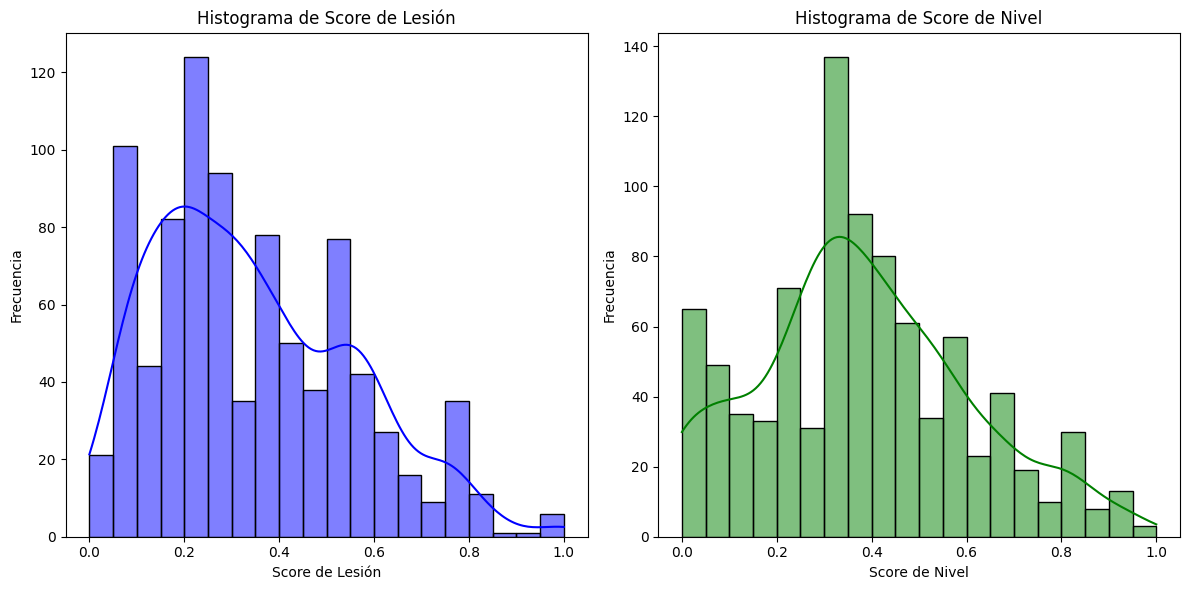

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que df_labelizado contiene las columnas score_lesion y score_nivel
# Ejemplo de cómo generar el histograma:

# Configuración de tamaño de la figura
plt.figure(figsize=(12, 6))

# Histograma para score_lesion
plt.subplot(1, 2, 1)  # (filas, columnas, índice del gráfico)
sns.histplot(df_scaled['score_lesion'], kde=True, color='blue', bins=20)
plt.title('Histograma de Score de Lesión')
plt.xlabel('Score de Lesión')
plt.ylabel('Frecuencia')

# Histograma para score_nivel
plt.subplot(1, 2, 2)  # (filas, columnas, índice del gráfico)
sns.histplot(df_scaled['score_nivel'], kde=True, color='green', bins=20)
plt.title('Histograma de Score de Nivel')
plt.xlabel('Score de Nivel')
plt.ylabel('Frecuencia')

# Ajustar la disposición de los subgráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


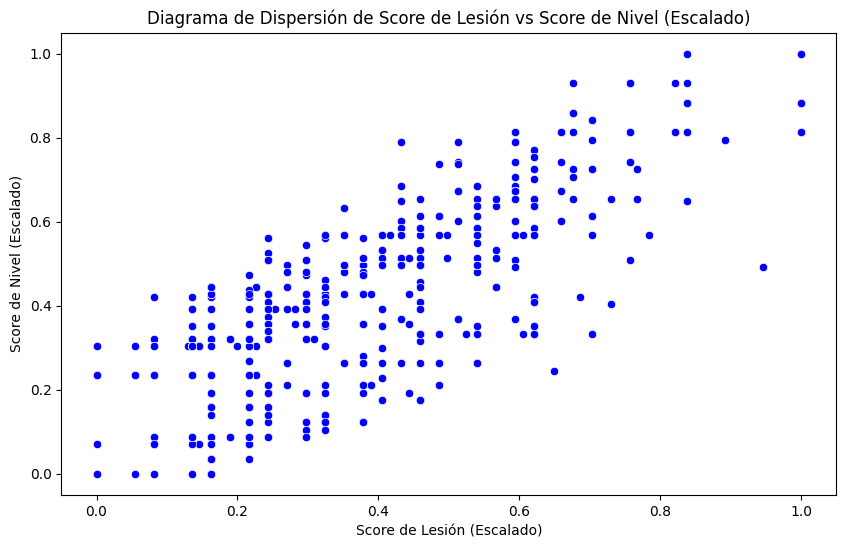

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que df_scaled contiene las columnas score_lesion y score_nivel
# Diagrama de dispersión para los valores de score_lesion y score_nivel en df_scaled:

# Configuración de tamaño de la figura
plt.figure(figsize=(10, 6))

# Diagrama de dispersión para los valores de score_lesion y score_nivel
sns.scatterplot(x=df_scaled['score_lesion'], y=df_scaled['score_nivel'], color='blue')

# Añadir títulos y etiquetas
plt.title('Diagrama de Dispersión de Score de Lesión vs Score de Nivel (Escalado)')
plt.xlabel('Score de Lesión (Escalado)')
plt.ylabel('Score de Nivel (Escalado)')

# Mostrar el gráfico
plt.show()


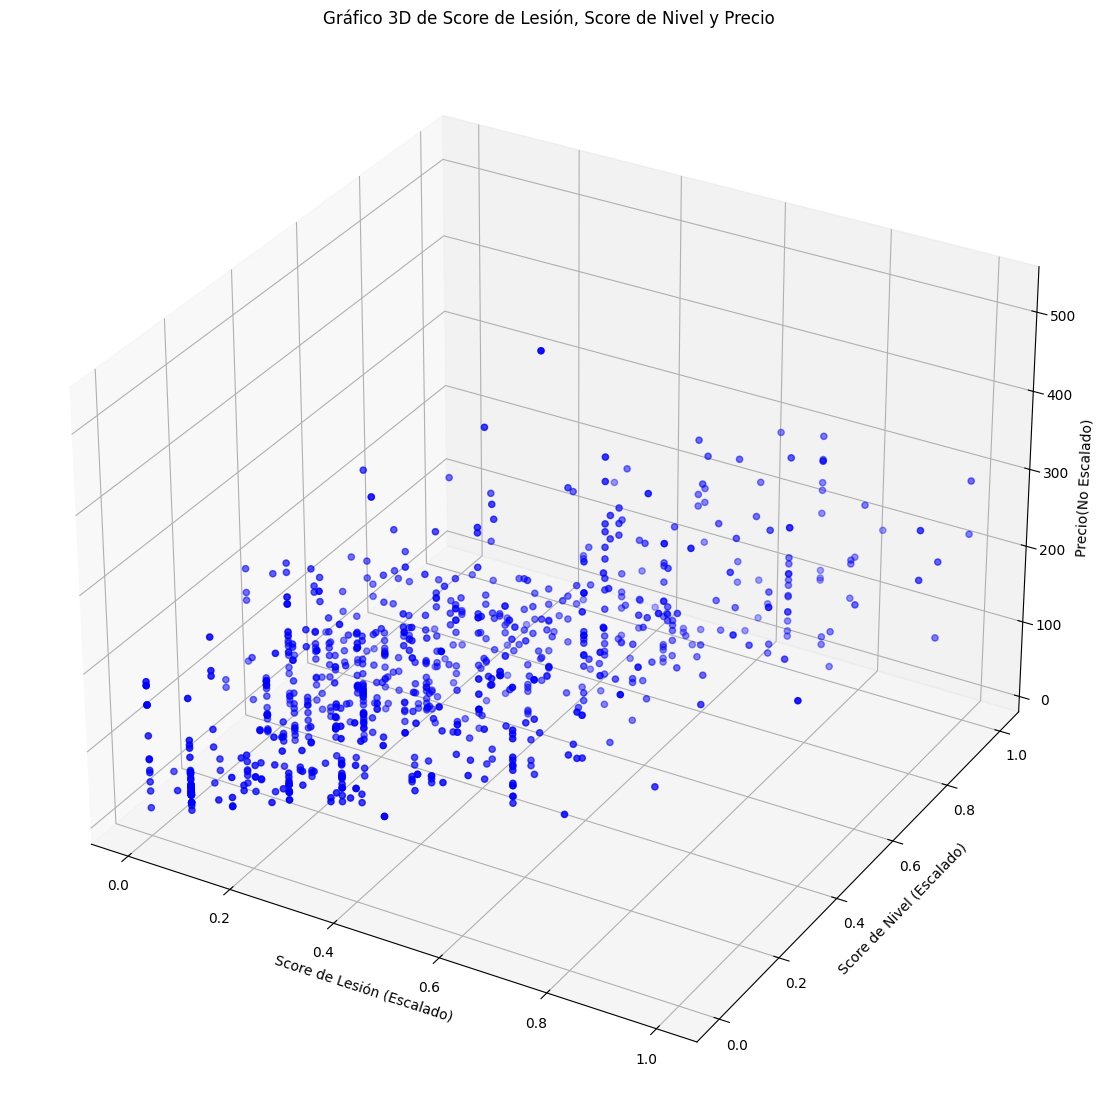

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Asegúrate de que df_scaled contiene las columnas score_lesion, score_nivel y la tercera variable (por ejemplo, 'score_tercero')

# Crear figura
fig = plt.figure(figsize=(20, 14))

# Crear un gráfico en 3D
ax = fig.add_subplot(111, projection='3d')

# Definir los valores de cada eje (score_lesion, score_nivel y otra variable)
x = df_scaled['score_lesion']
y = df_scaled['score_nivel']
z = df_scaled['Precio']  # Aquí puedes cambiar a cualquier otra columna de interés para el eje Z

# Crear el gráfico de dispersión 3D
ax.scatter(x, y, z, color='blue')

# Añadir etiquetas a los ejes
ax.set_xlabel('Score de Lesión (Escalado)')
ax.set_ylabel('Score de Nivel (Escalado)')
ax.set_zlabel('Precio' '(No Escalado)')

# Título del gráfico
ax.set_title('Gráfico 3D de Score de Lesión, Score de Nivel y Precio')

# Mostrar el gráfico
plt.show()
